<a href="https://colab.research.google.com/github/SDineshKumar1304/Emo_VoiceBot_LLM_BERT/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection
 - Data is collected from Hugging Face Datasets

In [3]:
from datasets import load_dataset

dataset = load_dataset("go_emotions", "raw")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/211225 [00:00<?, ? examples/s]

In [4]:
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

--2024-03-01 08:13:07--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c06::cf, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13.52M  61.6MB/s    in 0.2s    

2024-03-01 08:13:07 (61.6 MB/s) - ‘data/full_dataset/goemotions_1.csv’ saved [14174600/14174600]

--2024-03-01 08:13:08--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c06::cf, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP 

# Performing EDA

In [5]:
import pandas as pd

In [6]:
data=pd.read_csv("/content/data/full_dataset/goemotions_1.csv")

In [7]:
data.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
data.columns

Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [9]:
data.shape

(70000, 37)

In [10]:
data.value_counts()

text                                                                                                                                   id       author               subreddit         link_id    parent_id   created_utc   rater_id  example_very_unclear  admiration  amusement  anger  annoyance  approval  caring  confusion  curiosity  desire  disappointment  disapproval  disgust  embarrassment  excitement  fear  gratitude  grief  joy  love  nervousness  optimism  pride  realization  relief  remorse  sadness  surprise  neutral
 "What do Scottish people look like?" How I would love to have been there to take a swing at that softball.                            ee7cu0z  Cheezeburger_Picnic  Scotland          t3_agmpx9  t3_agmpx9   1.547658e+09  37        False                 0           0          0      0          0         0       0          1          0       0               0            0        0              0           0     0          0      0    1     0            0         0      0

In [11]:
data.isnull().sum()

text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

In [12]:
a=data.nunique()

In [13]:
a

text                    43182
id                      43358
author                  37803
subreddit                 483
link_id                 35054
parent_id               41423
created_utc             42947
rater_id                   81
example_very_unclear        2
admiration                  2
amusement                   2
anger                       2
annoyance                   2
approval                    2
caring                      2
confusion                   2
curiosity                   2
desire                      2
disappointment              2
disapproval                 2
disgust                     2
embarrassment               2
excitement                  2
fear                        2
gratitude                   2
grief                       2
joy                         2
love                        2
nervousness                 2
optimism                    2
pride                       2
realization                 2
relief                      2
remorse   

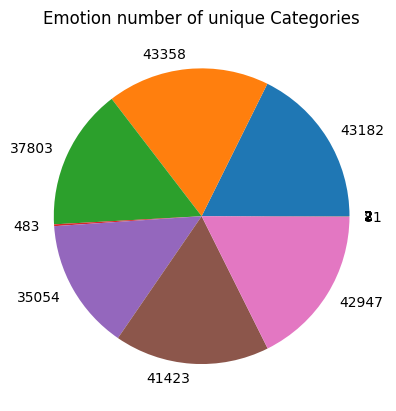

In [14]:
import matplotlib.pyplot as plt
plt.title("Emotion number of unique Categories")
plt.pie(a,labels=a)
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  70000 non-null  object 
 1   id                    70000 non-null  object 
 2   author                70000 non-null  object 
 3   subreddit             70000 non-null  object 
 4   link_id               70000 non-null  object 
 5   parent_id             70000 non-null  object 
 6   created_utc           70000 non-null  float64
 7   rater_id              70000 non-null  int64  
 8   example_very_unclear  70000 non-null  bool   
 9   admiration            70000 non-null  int64  
 10  amusement             70000 non-null  int64  
 11  anger                 70000 non-null  int64  
 12  annoyance             70000 non-null  int64  
 13  approval              70000 non-null  int64  
 14  caring                70000 non-null  int64  
 15  confusion          

In [16]:
data.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
data2=pd.read_csv("/content/data/full_dataset/goemotions_2.csv")

In [18]:
data2.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,We can hope,ee3o3ko,darkenseyreth,EdmontonOilers,t3_ag4r9j,t1_ee3mhad,1.547529e+09,62,False,0,...,0,0,1,0,0,0,0,0,0,0
1,Shhh don't give them the idea!,eebl3z7,BoinkBoinkEtAliae,MurderedByWords,t3_ah3o76,t1_eeb68lo,1.547777e+09,76,False,0,...,0,0,0,0,0,0,0,0,0,0
2,"Thank you so much, kind stranger. I really nee...",ed4fe9l,savageleaf,raisedbynarcissists,t3_abwh00,t1_ed4etbj,1.546482e+09,24,False,0,...,0,0,0,0,0,0,0,0,0,0
3,Ion know but it would be better for you to jus...,efavtdu,CADDiLLXC,darknet,t3_al4njw,t3_al4njw,1.548800e+09,62,False,0,...,0,0,0,0,0,0,0,0,0,1
4,I'm honestly surprised. We should have fallen ...,ee2imz2,CorporalThornberry,CollegeBasketball,t3_afxt6t,t1_ee22nyr,1.547497e+09,55,False,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data2.shape

(70000, 37)

In [20]:
data2.isnull().sum()

text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  70000 non-null  object 
 1   id                    70000 non-null  object 
 2   author                70000 non-null  object 
 3   subreddit             70000 non-null  object 
 4   link_id               70000 non-null  object 
 5   parent_id             70000 non-null  object 
 6   created_utc           70000 non-null  float64
 7   rater_id              70000 non-null  int64  
 8   example_very_unclear  70000 non-null  bool   
 9   admiration            70000 non-null  int64  
 10  amusement             70000 non-null  int64  
 11  anger                 70000 non-null  int64  
 12  annoyance             70000 non-null  int64  
 13  approval              70000 non-null  int64  
 14  caring                70000 non-null  int64  
 15  confusion          

In [22]:
data2['example_very_unclear'].unique()

array([False,  True])

In [23]:
data3=pd.read_csv("/content/data/full_dataset/goemotions_3.csv")

In [24]:
data3.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,Worst ending ever! I won't spoil it but this o...,eee021b,tribaltrak,movies,t3_agxbsx,t3_agxbsx,1.547847e+09,42,False,0,...,0,0,0,0,0,0,0,0,0,0
1,Happy cake day u/sneakpeekbot!,ed00f1z,InfernicFuse,danganronpa,t3_abajdo,t1_eczoocj,1.546328e+09,24,False,0,...,0,0,0,0,0,0,0,0,0,0
2,Was he rejected because of his methodology or ...,ee1h5v1,OssToYouGoodSir,medicine,t3_aflo7s,t1_ee0v0vv,1.547464e+09,77,False,0,...,0,0,0,0,0,0,0,0,0,0
3,"thanks, I agree",eemi935,PMOFreeForever,NoFap,t3_ai7h09,t1_eelu54r,1.548088e+09,46,False,0,...,0,0,0,0,0,0,0,0,0,0
4,Why would you doubt it dumbass?,eduun99,ugliestman1,Tinder,t3_aejwne,t1_edumeal,1.547255e+09,36,False,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data3.tail()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
71220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,1.547634e+09,16,False,0,...,1,0,0,0,0,0,0,0,0,0
71221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,1.548553e+09,15,False,0,...,0,0,0,0,0,0,0,0,0,0
71222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,1.547684e+09,70,False,1,...,0,0,0,0,0,0,0,0,0,0
71223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,1.547169e+09,4,False,0,...,0,0,0,0,0,0,0,0,0,0
71224,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,edze9g4,HelperBot_,MorbidReality,t3_afhw30,t1_edze91s,1.547397e+09,61,True,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71225 entries, 0 to 71224
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  71225 non-null  object 
 1   id                    71225 non-null  object 
 2   author                71225 non-null  object 
 3   subreddit             71225 non-null  object 
 4   link_id               71225 non-null  object 
 5   parent_id             71225 non-null  object 
 6   created_utc           71225 non-null  float64
 7   rater_id              71225 non-null  int64  
 8   example_very_unclear  71225 non-null  bool   
 9   admiration            71225 non-null  int64  
 10  amusement             71225 non-null  int64  
 11  anger                 71225 non-null  int64  
 12  annoyance             71225 non-null  int64  
 13  approval              71225 non-null  int64  
 14  caring                71225 non-null  int64  
 15  confusion          

In [27]:
data3.isnull().sum()

text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

# Merging All the Three csv Data

In [28]:
data_merged = pd.concat([data, data2, data3], ignore_index=True)

In [29]:
data_merged

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,1.547634e+09,16,False,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,1.548553e+09,15,False,0,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,1.547684e+09,70,False,1,...,0,0,0,0,0,0,0,0,0,0
211223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,1.547169e+09,4,False,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data_merged.shape

(211225, 37)

In [31]:
data_merged.isnull().sum()

text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

In [32]:
data_merged.tail()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,1.547634e+09,16,False,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,1.548553e+09,15,False,0,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,1.547684e+09,70,False,1,...,0,0,0,0,0,0,0,0,0,0
211223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,1.547169e+09,4,False,0,...,0,0,0,0,0,0,0,0,0,0
211224,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,edze9g4,HelperBot_,MorbidReality,t3_afhw30,t1_edze91s,1.547397e+09,61,True,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data_merged.value_counts()

text                                                                                                                                   id       author          subreddit     link_id    parent_id   created_utc   rater_id  example_very_unclear  admiration  amusement  anger  annoyance  approval  caring  confusion  curiosity  desire  disappointment  disapproval  disgust  embarrassment  excitement  fear  gratitude  grief  joy  love  nervousness  optimism  pride  realization  relief  remorse  sadness  surprise  neutral
 "If you don't wear BROWN AND ORANGE...YOU DON'T MATTER!" We need a tshirt with that on it asap!                                       ee3fxil  pj7140          Browns        t3_afy4f0  t3_afy4f0   1.547522e+09  1         False                 0           0          0      0          0         0       0          0          0       0               0            0        0              0           0     0          0      0    0     0            0         0      0            0     

In [34]:
data_merged.columns

Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

# Merged Data Information Retrival

In [35]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float64
 7   rater_id              211225 non-null  int64  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int64  
 10  amusement             211225 non-null  int64  
 11  anger                 211225 non-null  int64  
 12  annoyance             211225 non-null  int64  
 13  approval              211225 non-null  int64  
 14  caring                211225 non-null  int64  
 15  

# Performing Data Transformation

In [36]:
data_merged['example_very_unclear'].unique()

array([False,  True])

In [37]:
data_merged['example_very_unclear'].value_counts()

False    207814
True       3411
Name: example_very_unclear, dtype: int64

In [38]:
data_merged['example_very_unclear'] = data_merged['example_very_unclear'].replace([True, False], [1, 0])

In [39]:
data_merged['example_very_unclear']

0         0
1         1
2         0
3         0
4         0
         ..
211220    0
211221    0
211222    0
211223    0
211224    1
Name: example_very_unclear, Length: 211225, dtype: int64

In [40]:
data_merged.tail()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,1.547634e+09,16,0,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,1.548553e+09,15,0,0,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,1.547684e+09,70,0,1,...,0,0,0,0,0,0,0,0,0,0
211223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,1.547169e+09,4,0,0,...,0,0,0,0,0,0,0,0,0,0
211224,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,edze9g4,HelperBot_,MorbidReality,t3_afhw30,t1_edze91s,1.547397e+09,61,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float64
 7   rater_id              211225 non-null  int64  
 8   example_very_unclear  211225 non-null  int64  
 9   admiration            211225 non-null  int64  
 10  amusement             211225 non-null  int64  
 11  anger                 211225 non-null  int64  
 12  annoyance             211225 non-null  int64  
 13  approval              211225 non-null  int64  
 14  caring                211225 non-null  int64  
 15  

In [42]:
data_merged

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,1,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,1.547634e+09,16,0,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,1.548553e+09,15,0,0,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,1.547684e+09,70,0,1,...,0,0,0,0,0,0,0,0,0,0
211223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,1.547169e+09,4,0,0,...,0,0,0,0,0,0,0,0,0,0


# Dropping the unwanted Columns

In [43]:
data_merged.drop(columns=['id','author','subreddit','link_id','parent_id','created_utc','rater_id'],inplace=True)

In [44]:
data_merged

,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,Everyone likes [NAME].,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211223,The FDA has plenty to criticize. But like here...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
data_merged.shape

(211225, 30)

# Data Cleaning

In [46]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [47]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [49]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer

def clean_text(sentence):
    text = sentence.lower()
    text = BeautifulSoup(text, 'html.parser').get_text()
    text = ' '.join([word for word in text.split() if not word.startswith('http')])
    text = ''.join([char for char in text if char not in string.punctuation + '’‘'])
    text = ''.join([i for i in text if not i.isdigit()])
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join([word for word in word_tokens if word.lower() not in stop_words])
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in tokens])

    return text


In [50]:
print("Before Cleaning :")
data_merged['text']

Before Cleaning :


0                                           That game hurt.
1          >sexuality shouldn’t be a grouping category I...
2            You do right, if you don't care then fuck 'em!
3                                        Man I love reddit.
4         [NAME] was nowhere near them, he was by the Fa...
                                ...                        
211220                               Everyone likes [NAME].
211221    Well when you’ve imported about a gazillion of...
211222                                   That looks amazing
211223    The FDA has plenty to criticize. But like here...
211224    Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...
Name: text, Length: 211225, dtype: object

In [51]:
data_merged['cleaned_text']=data_merged['text'].apply(clean_text)

<ipython-input-49-be4876097338>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [52]:
print("After Cleaning :")
data_merged['cleaned_text']

After Cleaning :


0                                                 game hurt
1         sexuality shouldnt grouping category make diff...
2                                   right dont care fuck em
3                                           man love reddit
4                                  name nowhere near falcon
                                ...                        
211220                                   everyone like name
211221    well youve imported gazillion country get serious
211222                                         look amazing
211223    fda plenty criticize like usually criticized h...
211224      desktop link rhelperbot downvote remove counter
Name: cleaned_text, Length: 211225, dtype: object

In [53]:
data_merged

,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,cleaned_text
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,game hurt
1,>sexuality shouldn’t be a grouping category I...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sexuality shouldnt grouping category make diff...
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,right dont care fuck em
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,man love reddit
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,name nowhere near falcon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,Everyone likes [NAME].,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,everyone like name
211221,Well when you’ve imported about a gazillion of...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,well youve imported gazillion country get serious
211222,That looks amazing,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,look amazing
211223,The FDA has plenty to criticize. But like here...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fda plenty criticize like usually criticized h...


In [54]:
data_merged.drop(columns=['text'],inplace=True)

In [55]:
data_merged.head()

,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,cleaned_text
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,game hurt
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sexuality shouldnt grouping category make diff...
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,right dont care fuck em
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,man love reddit
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,name nowhere near falcon


In [56]:
data_merged['text']=data_merged['cleaned_text']

In [57]:
data_merged

,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,cleaned_text,text
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,game hurt,game hurt
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,sexuality shouldnt grouping category make diff...,sexuality shouldnt grouping category make diff...
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,right dont care fuck em,right dont care fuck em
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,man love reddit,man love reddit
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,name nowhere near falcon,name nowhere near falcon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,everyone like name,everyone like name
211221,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,well youve imported gazillion country get serious,well youve imported gazillion country get serious
211222,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,look amazing,look amazing
211223,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,fda plenty criticize like usually criticized h...,fda plenty criticize like usually criticized h...


In [58]:
data_merged.drop(columns=['cleaned_text'],inplace=True)

In [59]:
data_merged.head()

,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,text
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,game hurt
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sexuality shouldnt grouping category make diff...
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,right dont care fuck em
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,man love reddit
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,name nowhere near falcon


In [65]:
data_merged.columns

Index(['example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance',
       'approval', 'caring', 'confusion', 'curiosity', 'desire',
       'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'neutral', 'text'],
      dtype='object')

In [60]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [61]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_len = 128

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

# Split the dataset into training and validation sets

In [66]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data_merged['text'].values, data_merged.iloc[:, :29].values, test_size=0.2, random_state=42
)

# Trainning the model

In [67]:
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = torch.tensor(self.labels[idx], dtype=torch.float32)

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': label
        }

In [68]:
train_dataset = EmotionDataset(train_texts, train_labels, tokenizer, max_len)
val_dataset = EmotionDataset(val_texts, val_labels, tokenizer, max_len)

In [70]:
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=29
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# DataLoader

In [71]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

In [72]:
# Training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [74]:
pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=b2d4ae1bb508fc69bc62caf06e6a293b4d98322b213a59641339494d18b8b47d
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [79]:
import torch
from torchviz import make_dot
from transformers import BertModel, BertTokenizer

# Assuming you already have the model defined and loaded
model = BertModel.from_pretrained('bert-base-uncased')

# Create a dummy input to trace the model
dummy_input = torch.randint(0, 30522, (1, max_len), dtype=torch.long)  # Adjust max_len based on your model configuration

# Trace the model and generate the computational graph
output = model(dummy_input)
graph = make_dot(output.last_hidden_state.mean(), params=dict(model.named_parameters()))

graph.render("bert_model_graph", format="png", cleanup=True)

graph.view()


'bert_model_graph.pdf'

In [80]:
optimizer = AdamW(model.parameters(), lr=2e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
optimizer

AdamW (
Parameter Group 0
    betas: (0.9, 0.999)
    correct_bias: True
    eps: 1e-06
    lr: 2e-05
    weight_decay: 0.0
)

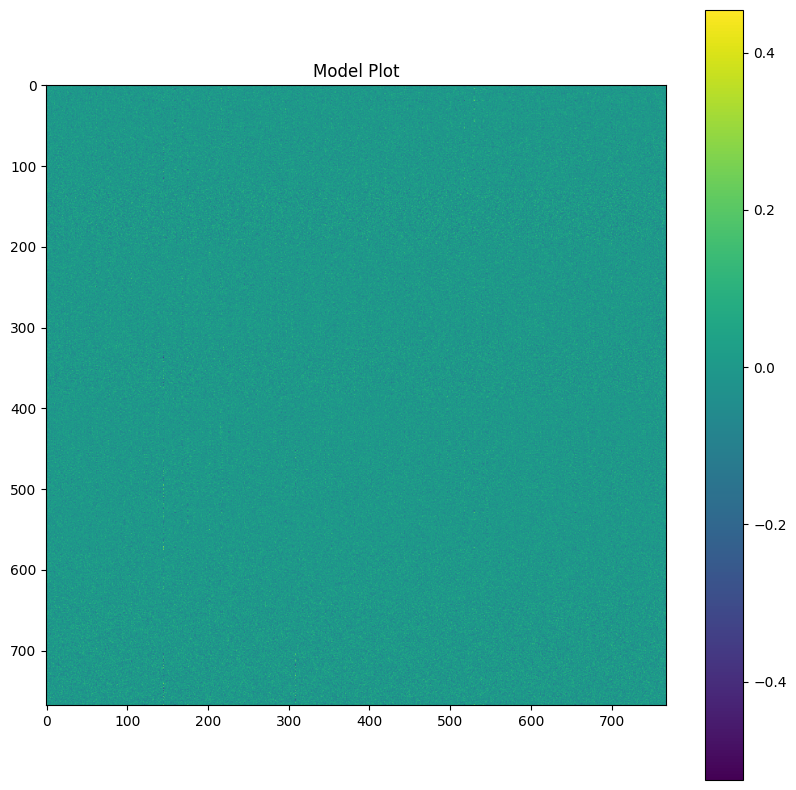

In [ ]:
model.to('cuda')
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(model.cpu().state_dict()['bert.encoder.layer.0.attention.self.query.weight'].detach().numpy(), cmap='viridis')
plt.colorbar()
plt.title('Model Plot')
plt.show()



In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=29)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-05)
num_epochs = 3

# Training loop
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Validation Phase
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            preds = torch.sigmoid(logits)

            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)
    print(classification_report(all_labels, (all_preds > 0.5).int(), target_names=data_merged.columns[:29]))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/EmoRoBERTa.pt")

# **END**